### Part 1: CNN

Use the dataset: https://www.tensorflow.org/datasets/catalog/citrus_leaves 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import splitfolders
import os

os.getcwd()

train = ImageDataGenerator(rescale=1/255)
data_set = train.flow_from_directory('/Users/akhilakumaripuppala/Desktop/Citrus/Leaves',class_mode = 'binary')

Found 609 images belonging to 5 classes.


Split it into a training set, and a test set.

In [4]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/Users/akhilakumaripuppala/Desktop/Citrus/Leaves', output='/Users/akhilakumaripuppala/Desktop/Citrus/output', seed=1337, ratio=(.6, .3, .1), group_prefix=None) # default values

Copying files: 609 files [00:01, 360.84 files/s]


In [5]:
#/Users/akhilakumaripuppala/Desktop/Citrus/output/test
data_dir = '/Users/akhilakumaripuppala/Desktop/Citrus/output/train'
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

data_dir1 = '/Users/akhilakumaripuppala/Desktop/Citrus/output/val'
batch_size = 32
img_height = 180
img_width = 180
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir1,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

data_dir2 = '/Users/akhilakumaripuppala/Desktop/Citrus/output//test'
batch_size = 32
img_height = 180
img_width = 180
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 362 files belonging to 5 classes.
Found 180 files belonging to 5 classes.
Found 67 files belonging to 5 classes.
['Black spot', 'Melanose', 'canker', 'greening', 'healthy']


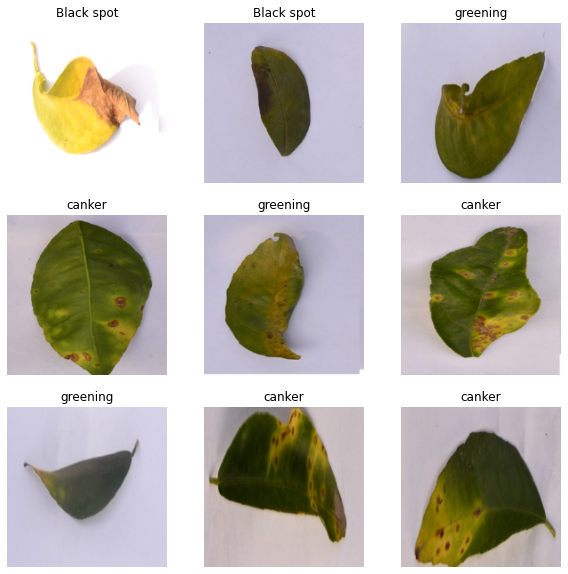

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Build a CNN model 


In [26]:
num_classes = 5
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout, Flatten

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'),
  layers.LeakyReLU(alpha=0.1),
  layers.MaxPooling2D((2, 2),padding='same'),
  layers.Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same'),
  layers.LeakyReLU(alpha=0.1),
  layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
  layers.Conv2D(128, (3, 3), activation='linear',padding='same'),
  layers.LeakyReLU(alpha=0.1),                  
  layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
  layers.Flatten(),
  layers.Dense(128, activation='linear'),
  layers.LeakyReLU(alpha=0.1),                 
  layers.Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# simple early stopping
#es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max')
epochs=20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20
12/12 [==============================] - 19s 2s/step - loss: 2.6612 - accuracy: 0.2804 - val_loss: 1.4997 - val_accuracy: 0.3389
Epoch 2/20
12/12 [==============================] - 18s 1s/step - loss: 1.4070 - accuracy: 0.3658 - val_loss: 1.3576 - val_accuracy: 0.4000
Epoch 3/20
12/12 [==============================] - 20s 2s/step - loss: 1.3214 - accuracy: 0.4407 - val_loss: 1.2185 - val_accuracy: 0.4611
Epoch 4/20
12/12 [==============================] - 22s 2s/step - loss: 1.0685 - accuracy: 0.5126 - val_loss: 1.1386 - val_accuracy: 0.5111
Epoch 5/20
12/12 [==============================] - 20s 2s/step - loss: 1.1099 - accuracy: 0.5132 - val_loss: 1.1344 - val_accuracy: 0.4444
Epoch 6/20
12/12 [==============================] - 20s 2s/step - loss: 0.9986 - accuracy: 0.5525 - val_loss: 1.0412 - val_accuracy: 0.4889
Epoch 7/20
12/12 [==============================] - 20s 2s/step - loss: 0.8391 - accuracy: 0.6533 - val_loss: 1.0796 - val_accuracy: 0.5111
Epoch 8/20
12/12 [==

In [27]:
num_classes = 5

model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.LeakyReLU(alpha=0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.LeakyReLU(alpha=0.1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.LeakyReLU(alpha=0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# simple early stopping
#es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
epochs=40
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/20
12/12 [==============================] - 9s 710ms/step - loss: 1.6761 - accuracy: 0.3152 - val_loss: 1.2633 - val_accuracy: 0.4833
Epoch 2/20
12/12 [==============================] - 11s 1s/step - loss: 1.1563 - accuracy: 0.5946 - val_loss: 1.2207 - val_accuracy: 0.4333
Epoch 3/20
12/12 [==============================] - 8s 694ms/step - loss: 0.9799 - accuracy: 0.5849 - val_loss: 1.0734 - val_accuracy: 0.5167
Epoch 4/20
12/12 [==============================] - 8s 659ms/step - loss: 0.9150 - accuracy: 0.5680 - val_loss: 1.4429 - val_accuracy: 0.3778
Epoch 5/20
12/12 [==============================] - 8s 642ms/step - loss: 0.9107 - accuracy: 0.6197 - val_loss: 0.8504 - val_accuracy: 0.6611
Epoch 6/20
12/12 [==============================] - 8s 645ms/step - loss: 0.5556 - accuracy: 0.8028 - val_loss: 0.7024 - val_accuracy: 0.7111
Epoch 7/20
12/12 [==============================] - 8s 677ms/step - loss: 0.4142 - accuracy: 0.8532 - val_loss: 0.9496 - val_accuracy: 0.6500
Epoch 8/

Fine-tune it and learn its accuracy. Bring the minimum accuracy of 85%. Jot down any challenges/issues you face during this process. 

In [33]:
epochs=120 #20,40,70,120
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/120
12/12 [==============================] - 7s 578ms/step - loss: 3.5944e-05 - accuracy: 1.0000 - val_loss: 1.5412 - val_accuracy: 0.8222
Epoch 2/120
12/12 [==============================] - 8s 678ms/step - loss: 3.5013e-05 - accuracy: 1.0000 - val_loss: 1.5511 - val_accuracy: 0.8278
Epoch 3/120
12/12 [==============================] - 13s 1s/step - loss: 3.4653e-05 - accuracy: 1.0000 - val_loss: 1.5610 - val_accuracy: 0.8278
Epoch 4/120
12/12 [==============================] - 17s 1s/step - loss: 3.4070e-05 - accuracy: 1.0000 - val_loss: 1.5540 - val_accuracy: 0.8278
Epoch 5/120
12/12 [==============================] - 21s 2s/step - loss: 3.3156e-05 - accuracy: 1.0000 - val_loss: 1.5639 - val_accuracy: 0.8278
Epoch 6/120
12/12 [==============================] - 18s 2s/step - loss: 3.2541e-05 - accuracy: 1.0000 - val_loss: 1.5615 - val_accuracy: 0.8278
Epoch 7/120
12/12 [==============================] - 15s 1s/step - loss: 3.2339e-05 - accuracy: 1.0000 - val_loss: 1.5707 - va

In [34]:
#for model-2 with a epochs of 120 resulted in 85% of test accuracy
test_eval = model2.evaluate(test_ds,verbose=0)
print('Test accuracy:', test_eval[1])

Test accuracy: 0.855555534362793


In [ ]:
#faced issues like ram run time
#due to more no.of images as we increase the epochs value, CNN model fitting takes long time

If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem? 

In [ ]:
reduce the mini batch size.
reduce dimensionality using a larger stride in one or more layers.
remove one or more layers.
use 16-bit float instead of 32 bit float 
distribute the CNN across multiple devices

What are the advantages of a CNN over a fully connected DNN for image classification? 

In [ ]:
fewer parameters.so it is faster to train.
reuse kernels which helps in detect feautures anywhere
architecture embedds knowledge of neighboring pixels.

### Part 2: NLP

Solve spam sms detection problem using Gensim word2vec. You can use algorithm of your choice to train and evaluate the model.

In [66]:
import pandas as pd
messages = pd.read_csv("spam.csv", encoding='latin-1')
messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

messages['length'] = messages['v2'].apply(len)
messages_data = messages['v2']
messages_labels = messages['v1']
print(messages) 

        v1                                                 v2  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]


In [69]:
# importing all necessary modules
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akhilakumaripuppala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhilakumaripuppala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [70]:
#create empty list
review_data_list = list()

indv_lines = messages['v2'].values.tolist()
for line in indv_lines:

	#create word tokens as well as remove puntuation in one go
	rem_tok_punc = RegexpTokenizer(r'\w+')

	tokens = rem_tok_punc.tokenize(line)


	#convert the words to lower case
	words = [w.lower() for w in tokens]

	#Invoke all the english stopwords
	stop_word_list = set(stopwords.words('english'))

	#Remove stop words
	words = [w for w in words if not w in stop_word_list]

	#Append words in the review_data_list list.
	review_data_list.append(words)
len(review_data_list)

5572

In [107]:
len(review_data_list)

5572

In [131]:
import gensim
from gensim.models import Word2Vec
Embedding_Dim = 100
#train word2vec model
model = Word2Vec(review_data_list, min_count = 1)
print(model)

model.wv.word_vec('entry')

Word2Vec(vocab=8569, vector_size=100, alpha=0.025)


array([-0.08018856,  0.13517743,  0.0342898 , -0.00508988,  0.00805442,
       -0.18160532,  0.05296511,  0.20896272, -0.07564802, -0.05707214,
       -0.05717218, -0.166865  , -0.03666604,  0.02323155,  0.00852575,
       -0.09252174,  0.02929165, -0.08838463, -0.00030767, -0.18056487,
        0.07002299,  0.04720157,  0.07094283, -0.0515692 , -0.02191521,
        0.01318238, -0.08089206, -0.08785368, -0.07789044,  0.01414063,
        0.11342344,  0.00055402,  0.0244402 , -0.10221723, -0.02238491,
        0.121265  ,  0.00241609, -0.08323745, -0.07962259, -0.17927833,
        0.0301827 , -0.103526  , -0.05298004,  0.00663658,  0.09609888,
       -0.06477736, -0.11355641,  0.00553404,  0.02996109,  0.06002103,
        0.05725323, -0.08784026,  0.00455858, -0.02869378, -0.07725653,
        0.05779815,  0.07227304, -0.01980145, -0.11986575,  0.03554331,
        0.01494603,  0.02770437, -0.03168736,  0.01230948, -0.10328054,
        0.06914414,  0.02513537,  0.08376505, -0.14484791,  0.15

In [118]:
#word_vectors = model[model.wv.key_to_index]
#word_vectors

word_vectors = model.wv.key_to_index
len(word_vectors)

8569

In [ ]:
#Since the word2vec provides vectors for a word, we’ll create a function get_embedding_w2v() 
#for generating vectors for the whole document or query. 

#This function will use the word2vec model and generate the vectors for each word in the document.

In [155]:
# Function returning vector reperesentation of a document
data = []
def get_embedding_w2v(doc_tokens):
    embeddings = []
    if len(doc_tokens)<1:
        return np.zeros(100)
    else:
        for tok in doc_tokens:
            if tok in model.wv.index_to_key:
                embeddings.append(model.wv.word_vec(tok))
            else:
                embeddings.append(np.random.rand(100))
        # mean the vectors of individual words to get the vector of the document
        return np.mean(embeddings, axis=0)
for words in review_data_list:
    data.append(get_embedding_w2v(words))

In [156]:
len(data)
data

[array([-0.17348893,  0.26882723,  0.05123026,  0.00355275,  0.01050454,
        -0.39101198,  0.10829213,  0.44474828, -0.16454221, -0.13530107,
        -0.11046813, -0.3422962 , -0.1055607 ,  0.06998025,  0.02932075,
        -0.206337  ,  0.07377774, -0.21402858, -0.00850849, -0.4086087 ,
         0.12880044,  0.07619438,  0.16487263, -0.11104422, -0.06404255,
         0.02653852, -0.17346533, -0.19977418, -0.15266785,  0.0111175 ,
         0.2178955 , -0.01400314,  0.05273782, -0.22094035, -0.05971841,
         0.23425615,  0.02408764, -0.19781415, -0.18314624, -0.3942989 ,
         0.0576697 , -0.22514707, -0.09581417, -0.00868394,  0.23283169,
        -0.14405179, -0.2344197 ,  0.02088956,  0.08221155,  0.1498465 ,
         0.10451185, -0.19050162,  0.00890067, -0.05857054, -0.16246483,
         0.12560117,  0.17031267, -0.03438319, -0.25337258,  0.07087541,
         0.04132447,  0.08921276, -0.0503166 ,  0.00292999, -0.22625096,
         0.16719377,  0.05484252,  0.17805812, -0.2

In [122]:
# import numpy
# data = []    
# for words in review_data_list:
#     bag_vector = numpy.zeros(len(word_vectors))
#     for w in words:
#         bag_vector[word_vectors[w]] = 1
#     data.append(bag_vector)

In [157]:
len(data[0])

100

In [158]:
df = pd.DataFrame(data)

In [159]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.173489,0.268827,0.051230,0.003553,0.010505,-0.391012,0.108292,0.444748,-0.164542,-0.135301,...,0.328586,0.112498,0.047693,-0.082219,0.362128,0.200587,0.176992,-0.173584,0.082764,-0.024462
1,-0.191137,0.277838,0.050478,0.006321,0.005486,-0.410662,0.116763,0.469348,-0.175008,-0.145084,...,0.343784,0.119229,0.049238,-0.085269,0.385940,0.209176,0.179703,-0.183193,0.088107,-0.018899
2,-0.155452,0.241719,0.046675,0.003880,0.012811,-0.352068,0.098661,0.397558,-0.150726,-0.120162,...,0.293926,0.100631,0.040408,-0.076500,0.321147,0.178292,0.165853,-0.157051,0.075354,-0.025431
3,-0.285509,0.434400,0.080399,0.004273,0.013854,-0.636306,0.180745,0.726212,-0.265519,-0.216654,...,0.539079,0.182519,0.077393,-0.133942,0.594849,0.323938,0.286775,-0.290802,0.139771,-0.037418
4,-0.116013,0.180746,0.032540,0.001093,0.007725,-0.270781,0.073964,0.309203,-0.114842,-0.094168,...,0.228430,0.078015,0.031399,-0.051786,0.247701,0.135268,0.126471,-0.119101,0.056639,-0.016113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.254340,0.391673,0.079503,0.009391,0.017033,-0.573521,0.165860,0.648419,-0.248122,-0.195856,...,0.480255,0.166188,0.068686,-0.127057,0.533941,0.294977,0.268008,-0.254354,0.125904,-0.047615
5568,-0.219930,0.329168,0.060172,0.002571,0.011458,-0.485740,0.138293,0.559320,-0.206729,-0.166191,...,0.418948,0.142588,0.057616,-0.103300,0.452227,0.247392,0.216513,-0.221195,0.105936,-0.026753
5569,-0.012793,0.021058,0.005628,0.004331,-0.004635,-0.024284,0.009804,0.032467,-0.012420,-0.012628,...,0.025647,0.003013,0.004777,-0.004346,0.028498,0.017359,0.008298,-0.014492,0.008316,-0.001537
5570,-0.177421,0.276896,0.054762,0.002023,0.010203,-0.408009,0.115800,0.462448,-0.175366,-0.139736,...,0.347274,0.115647,0.046574,-0.086179,0.376100,0.206953,0.188979,-0.179516,0.090344,-0.030457


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Columns: 8569 entries, 0 to 8568
dtypes: float64(8569)
memory usage: 364.3 MB


In [160]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
    data, messages_labels, test_size = 0.20, random_state = 12)

In [161]:
len(y_train)

4457

In [165]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(docs_train, y_train)
predicted_values_svm = SVM.predict(docs_test)

acurracy_SVM = sklearn.metrics.accuracy_score(y_test, predicted_values_svm)
acurracy_SVM

0.8654708520179372